In [1]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [2]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, prepare_nway_results
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

matplotlib settings set


matplotlib settings set
This is NWAY Python API
nwaylib file /Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py


# Nway run in magnitude-only mode

In [3]:
magnitude_columns = [
                    ('rel_dered_mag_g_orig', 'auto'),
                    ('rel_dered_mag_r_orig', 'auto'),
                    ('rel_dered_mag_z_orig', 'auto'),
                    ('rel_dered_mag_w1_orig', 'auto'),
                    ('rel_dered_mag_w2_orig', 'auto'),
                    ('rel_dered_g_r_orig', 'auto'),
                    ('rel_dered_r_z_orig', 'auto'),
                    ('rel_dered_g_z_orig', 'auto'),
                    ('rel_dered_z_w1_orig', 'auto'),
                    ('rel_dered_r_w2_orig', 'auto'),
                    ('rel_dered_w1_w2_orig', 'auto'),
                    ]



ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_table = nway.table_from_fits(data_path+'desi_lh.fits', poserr_value=0.1, magnitude_columns = magnitude_columns)

nway_args = {'match_radius':30, 'prior_completeness':1, 'mag_include_radius': 5.0,
'store_mag_hists': True,}


    adding angular separation columns
matching: 145071 matches after filtering by search radius
Primary catalogue "EROSITA" (9215), density gives 2.10e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 9215/9215 [00:02<00:00, 3637.43it/s]
Incorporating bias "DESI:rel_dered_mag_g_orig" ...
magnitude histogram of column "DESI_rel_dered_mag_g_orig": 8960 secure matches, 10156 insecure matches and 1982975 secure non-matches of 2418574 total entries (1991935 valid)
magnitude histogram stored to "DESI_rel_dered_mag_g_orig_fit.txt".


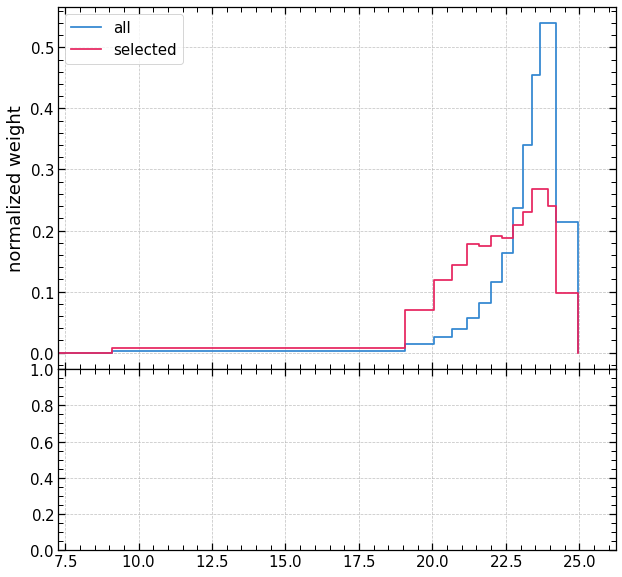

Incorporating bias "DESI:rel_dered_mag_r_orig" ...
magnitude histogram of column "DESI_rel_dered_mag_r_orig": 9434 secure matches, 10156 insecure matches and 2120176 secure non-matches of 2418574 total entries (2129610 valid)
magnitude histogram stored to "DESI_rel_dered_mag_r_orig_fit.txt".


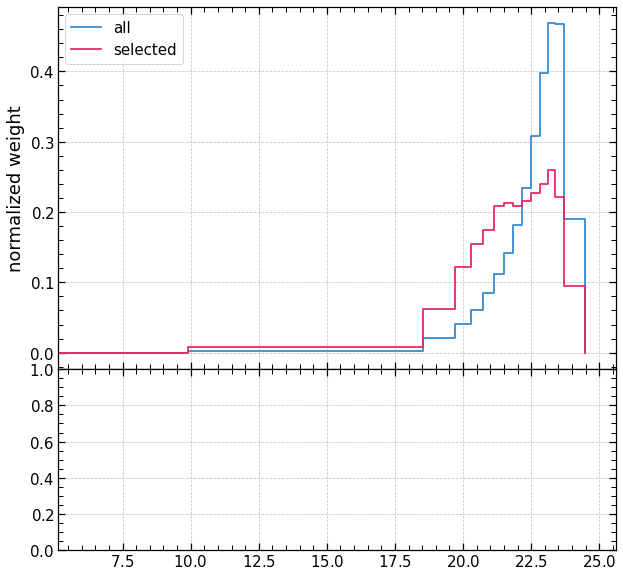

Incorporating bias "DESI:rel_dered_mag_z_orig" ...
magnitude histogram of column "DESI_rel_dered_mag_z_orig": 9756 secure matches, 10156 insecure matches and 2249949 secure non-matches of 2418574 total entries (2259705 valid)
magnitude histogram stored to "DESI_rel_dered_mag_z_orig_fit.txt".


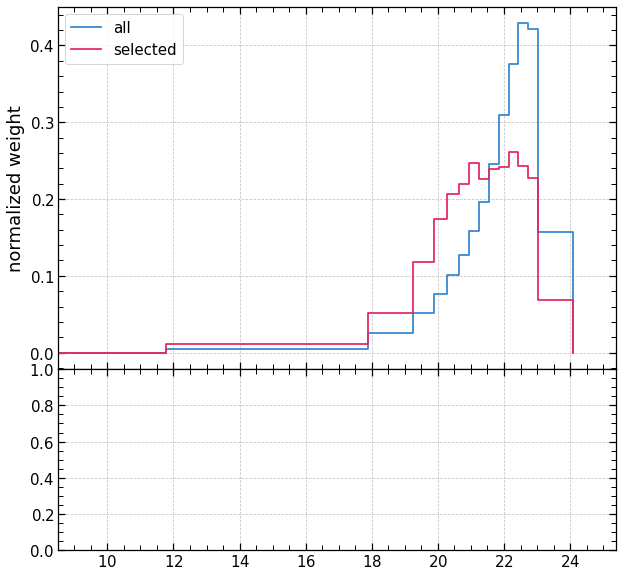

Incorporating bias "DESI:rel_dered_mag_w1_orig" ...
magnitude histogram of column "DESI_rel_dered_mag_w1_orig": 8684 secure matches, 10156 insecure matches and 1562025 secure non-matches of 2418574 total entries (1570709 valid)
magnitude histogram stored to "DESI_rel_dered_mag_w1_orig_fit.txt".


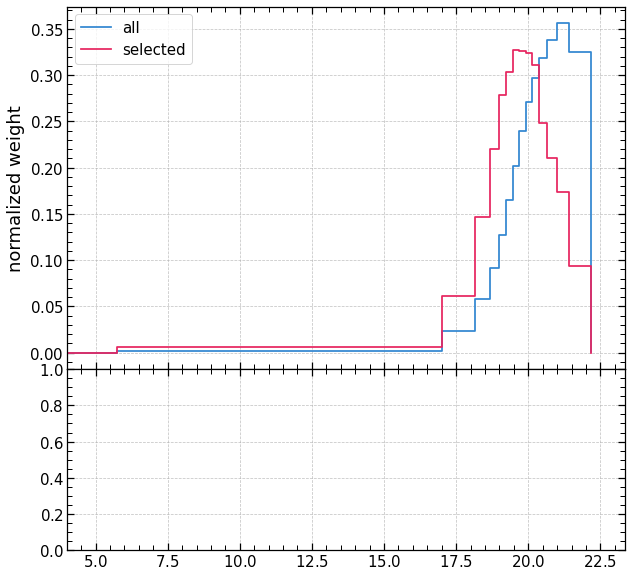

Incorporating bias "DESI:rel_dered_mag_w2_orig" ...
magnitude histogram of column "DESI_rel_dered_mag_w2_orig": 7762 secure matches, 10156 insecure matches and 972652 secure non-matches of 2418574 total entries (980414 valid)
magnitude histogram stored to "DESI_rel_dered_mag_w2_orig_fit.txt".


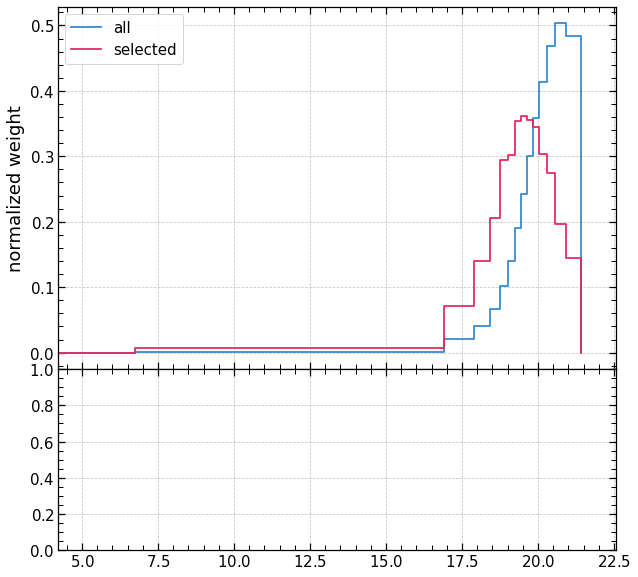

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:376: RuntimeWarning: divide by zero encountered in log10
  weights = log10(func(magcol))
Incorporating bias "DESI:rel_dered_g_r_orig" ...
magnitude histogram of column "DESI_rel_dered_g_r_orig": 8735 secure matches, 10156 insecure matches and 1860386 secure non-matches of 2418574 total entries (1869121 valid)
magnitude histogram stored to "DESI_rel_dered_g_r_orig_fit.txt".


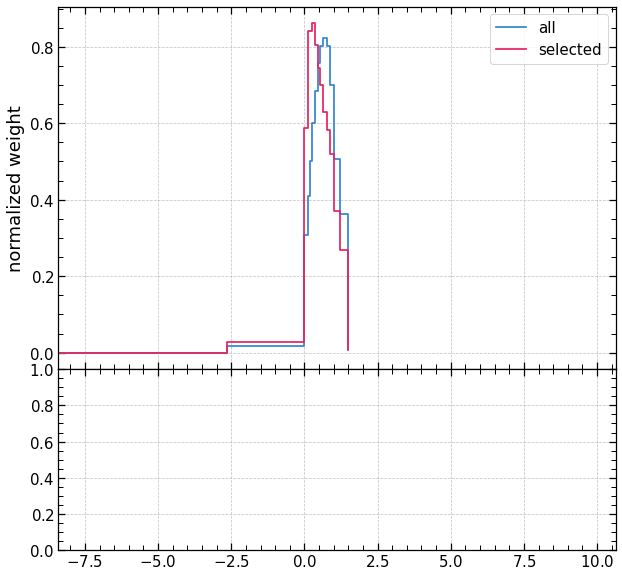

Incorporating bias "DESI:rel_dered_r_z_orig" ...
magnitude histogram of column "DESI_rel_dered_r_z_orig": 9163 secure matches, 10156 insecure matches and 1996373 secure non-matches of 2418574 total entries (2005536 valid)
magnitude histogram stored to "DESI_rel_dered_r_z_orig_fit.txt".


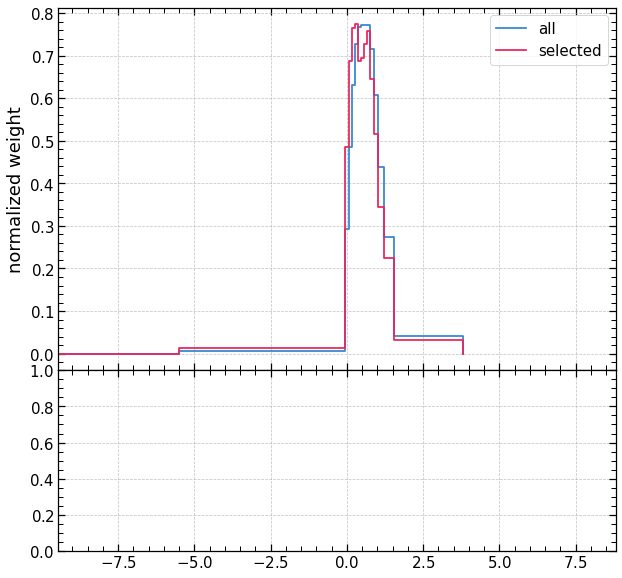

Incorporating bias "DESI:rel_dered_g_z_orig" ...
magnitude histogram of column "DESI_rel_dered_g_z_orig": 8639 secure matches, 10156 insecure matches and 1832581 secure non-matches of 2418574 total entries (1841220 valid)
magnitude histogram stored to "DESI_rel_dered_g_z_orig_fit.txt".


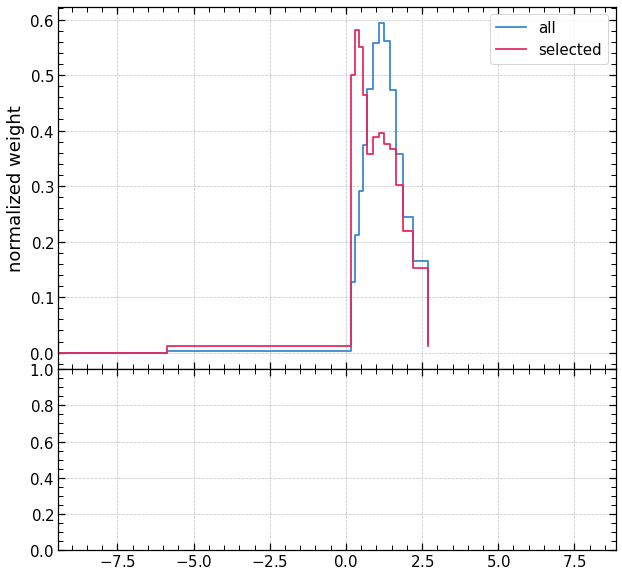

Incorporating bias "DESI:rel_dered_z_w1_orig" ...
magnitude histogram of column "DESI_rel_dered_z_w1_orig": 8549 secure matches, 10156 insecure matches and 1523769 secure non-matches of 2418574 total entries (1532318 valid)
magnitude histogram stored to "DESI_rel_dered_z_w1_orig_fit.txt".


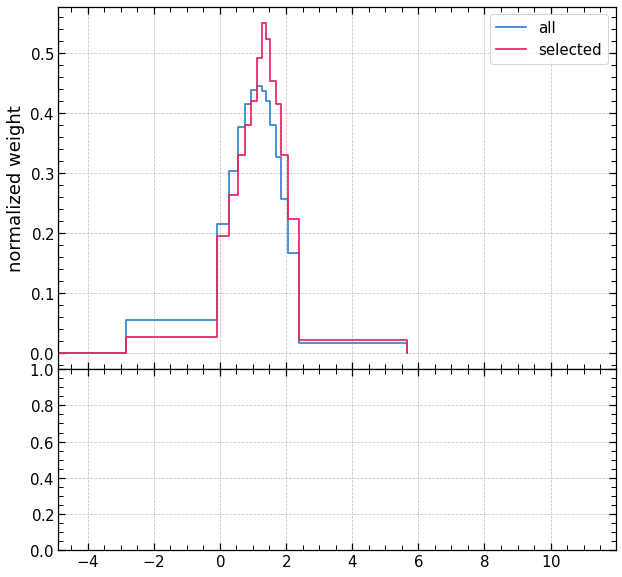

Incorporating bias "DESI:rel_dered_r_w2_orig" ...
magnitude histogram of column "DESI_rel_dered_r_w2_orig": 7373 secure matches, 10156 insecure matches and 867058 secure non-matches of 2418574 total entries (874431 valid)
magnitude histogram stored to "DESI_rel_dered_r_w2_orig_fit.txt".


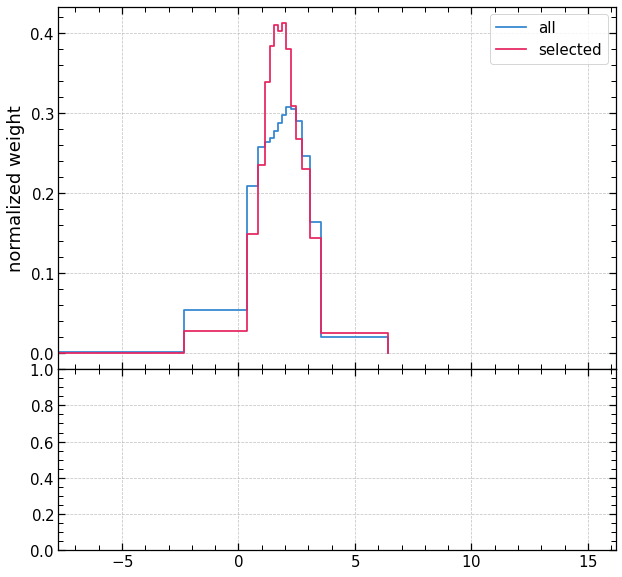

Incorporating bias "DESI:rel_dered_w1_w2_orig" ...
magnitude histogram of column "DESI_rel_dered_w1_w2_orig": 7651 secure matches, 10156 insecure matches and 942229 secure non-matches of 2418574 total entries (949880 valid)
magnitude histogram stored to "DESI_rel_dered_w1_w2_orig_fit.txt".


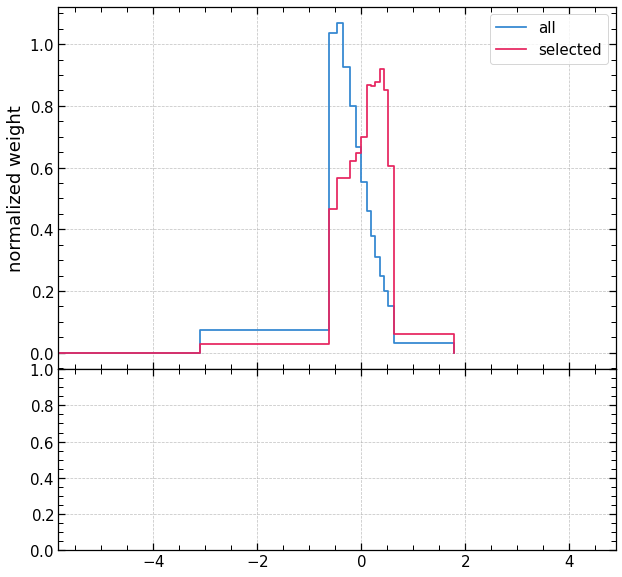


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [4]:

nway_res_orig = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)

# nway_res_random = nway.nwaylib.nway_match(
# [ero_random_table, desi_table],
# **nway_args
# )
#nway.calibrate_cutoff(nway_res, nway_res_random);

In [7]:
os.system('rm DESI*_fit.txt')

0

In [5]:
from scripts.cross_match_scripts import prepare_nway_results

nway_res, nway_res_best = prepare_nway_results(nway_res_orig,
                        ero_for_nway_fits = "ERO_lhpv_03_23_sd01_a15_g14.fits",
                        desi_for_nway_fits = "desi_lh.fits",
                        ero_full_cat = 'ERO_lhpv_03_23_sd01_a15_g14.pkl',
                        desi_full_cat = 'desi_lh.gz_pkl',
                        ero_desi_ctps_file = 'validation_ctps_ero_desi_lh.csv')


/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr

conjugation test passed
number of incorrect matches:  52  out of  608  validation sources
assigning nway_match_flag=2 to all incorrect matches
assigning nway_match_flag=1 to the corresponding correct pairs desi_id -- desi_id_true


In [6]:
nway_res_best

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,desi_id_true,nway_Separation_EROSITA_DESI,nway_bias_DESI_rel_dered_mag_g_orig,nway_bias_DESI_rel_dered_mag_r_orig,nway_bias_DESI_rel_dered_mag_z_orig,nway_bias_DESI_rel_dered_mag_w1_orig,nway_bias_DESI_rel_dered_mag_w2_orig,nway_bias_DESI_rel_dered_g_r_orig,nway_bias_DESI_rel_dered_r_z_orig,nway_bias_DESI_rel_dered_g_z_orig,nway_bias_DESI_rel_dered_z_w1_orig,nway_bias_DESI_rel_dered_r_w2_orig,nway_bias_DESI_rel_dered_w1_w2_orig,nway_match_flag,nway_prob_has_match,nway_prob_this_match,desi_id,nway_photometry_rel_dered_mag_g,nway_photometry_rel_dered_mag_r,nway_photometry_rel_dered_mag_z,nway_photometry_rel_dered_mag_w1,nway_photometry_rel_dered_mag_w2,nway_photometry_rel_dered_mag_w3,nway_photometry_rel_dered_mag_w4,nway_photometry_rel_dered_g_r,nway_photometry_rel_dered_r_z,nway_photometry_rel_dered_g_z,nway_photometry_rel_dered_z_w1,nway_photometry_rel_dered_r_w2,nway_photometry_rel_dered_w1_w2,nway_photometry_rel_dered_z_w3,nway_photometry_rel_dered_r_w4,nway_photometry_rel_dered_w3_w4,nway_photometry_prior_type,nway_photometry_nnmag_grzw1w2,nway_photometry_nnmag_grzw1w2_orig,nway_photometry_nnmag_grzw1,nway_photometry_nnmag_grzw1_orig,nway_photometry_nnmag_grz,nway_photometry_nnmag_grz_orig,nway_photometry_rel_dered_mag_g_orig,nway_photometry_rel_dered_mag_r_orig,nway_photometry_rel_dered_mag_z_orig,nway_photometry_rel_dered_mag_w1_orig,nway_photometry_rel_dered_mag_w2_orig,nway_photometry_rel_dered_mag_w3_orig,nway_photometry_rel_dered_mag_w4_orig,nway_photometry_rel_dered_g_r_orig,nway_photometry_rel_dered_r_z_orig,nway_photometry_rel_dered_g_z_orig,nway_photometry_rel_dered_z_w1_orig,nway_photometry_rel_dered_r_w2_orig,nway_photometry_rel_dered_w1_w2_orig,nway_photometry_rel_dered_z_w3_orig,nway_photometry_rel_dered_r_w4_orig,nway_photometry_rel_dered_w3_w4_orig,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_all_mag_g,desi_rel_mag_g,desi_rel_dered_mag_g,desi_all_mag_r,desi_rel_mag_r,desi_rel_dered_mag_r,desi_all_mag_z,desi_rel_mag_z,desi_rel_dered_mag_z,desi_all_mag_w1,desi_rel_mag_w1,desi_rel_dered_mag_w1,desi_vega_mag_w1,desi_all_mag_w2,desi_rel_mag_w2,desi_rel_dered_mag_w2,desi_vega_mag_w2,desi_all_mag_w3,desi_rel_mag_w3,desi_rel_dered_mag_w3,desi_vega_mag_w3,desi_all_mag_w4,desi_rel_mag_w4,desi_rel_dered_mag_w4,desi_vega_mag_w4,desi_rel_desi_flux_corr_z,desi_rel_dered_g_r,desi_rel_dered_g_z,desi_rel_dered_r_z,desi_rel_dered_z_w1,desi_rel_dered_r_w2,desi_rel_dered_w1_w2,desi_rel_dered_z_w3,desi_rel_dered_r_w4,desi_rel_dered_w3_w4,nway_n_match_flag_0,nway_n_match_flag_2,nway_is_closest,nway_is_within_pos_r98
0,SRGe J101903.3+563020,154.763934,56.505585,154.966043,50.066118,9.267930,15.858959,2.171120e-14,5.650445e-15,28.800014,7.495345,1211.871216,0.0,0.0,0.0,6207,5146,154.765943,56.504295,4.058504,102.778427,0.000023,6.268413e+08,6.270701e+08,0.0,0.0,0.023765,0.006185,7.077317,154.763934,56.505585,853324209744036352,7